<a href="https://colab.research.google.com/github/suinkangme/COMP432-GroupI/blob/main/Task2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
!gdown 1L5mB-u4-rZIt-CRVLEXPr6Li6W0d21ww
!gdown 1SAkn3JoiVPNxvOQZ97BznVSEcu1fmHDy

Downloading...
From: https://drive.google.com/uc?id=1L5mB-u4-rZIt-CRVLEXPr6Li6W0d21ww
To: /content/Dataset2_imagenet.csv
100% 32.0M/32.0M [00:00<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SAkn3JoiVPNxvOQZ97BznVSEcu1fmHDy
To: /content/Dataset3_imagenet.csv
100% 31.9M/31.9M [00:00<00:00, 159MB/s]


In [ ]:
dataset2 = pd.read_csv("/content/Dataset2_imagenet.csv")
dataset3 = pd.read_csv("/content/Dataset3_imagenet.csv")

In [ ]:
dataset2_labels = dataset2['label'].to_numpy()
dataset2_features = dataset2[dataset2.columns[:-1]].to_numpy()
dataset2_train_features, dataset2_test_features, dataset2_train_labels, dataset2_test_labels = train_test_split(dataset2_features,dataset2_labels, test_size=0.2, random_state=0)

In [ ]:
dataset3_labels = dataset3['label'].to_numpy()
dataset3_features = dataset3[dataset3.columns[:-1]].to_numpy()
dataset3_train_features, dataset3_test_features, dataset3_train_labels, dataset3_test_labels = train_test_split(dataset3_features,dataset3_labels, test_size=0.2, random_state=0)

In [ ]:
dataset2KNN = KNeighborsClassifier(n_neighbors=5).fit(dataset2_train_features,dataset2_train_labels)
score = dataset2KNN.score(dataset2_test_features,dataset2_test_labels)
print(score)

0.9583333333333334


In [ ]:
dataset3KNN = KNeighborsClassifier(n_neighbors=36).fit(dataset3_train_features,dataset3_train_labels)
score = dataset3KNN.score(dataset3_test_features,dataset3_test_labels)
print(score)

0.9925


In [ ]:
def kGraph(Xtrain,ytrain,Xtest,ytest):
  scores = []
  values = range(1,50)
  for k in values:
    KNN = KNeighborsClassifier(n_neighbors=k).fit(Xtrain,ytrain)
    score = KNN.score(Xtest,ytest)
    scores.append(score)
  print("Max accuracy of " + str(max(scores)) + " at k=" + str(scores.index(max(scores)) + 1))
  plt.figure()
  plt.plot(values,scores)

Max accuracy of 0.9566666666666667 at k=3
Max accuracy of 0.9616666666666667 at k=5
Max accuracy of 0.9583333333333334 at k=7
Max accuracy of 0.95 at k=5
Max accuracy of 0.9616666666666667 at k=3


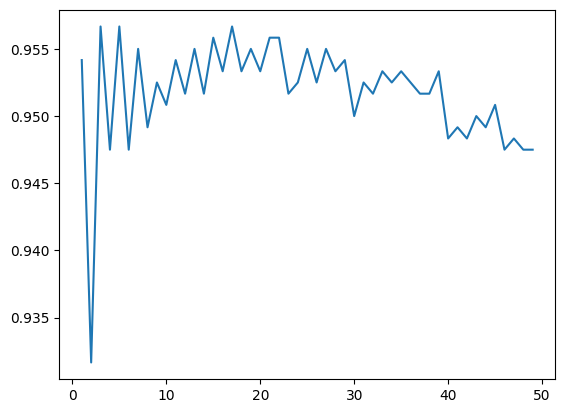

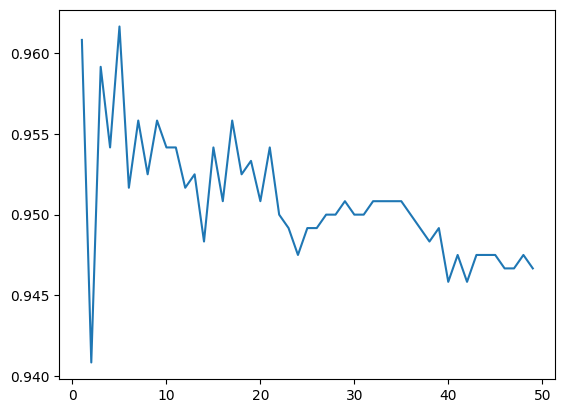

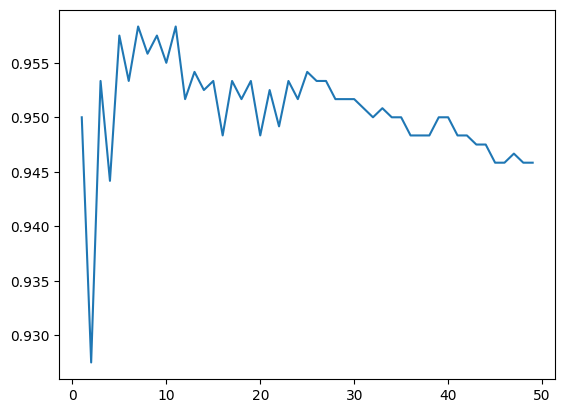

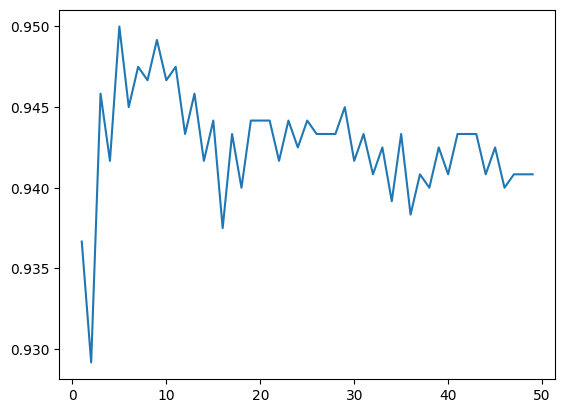

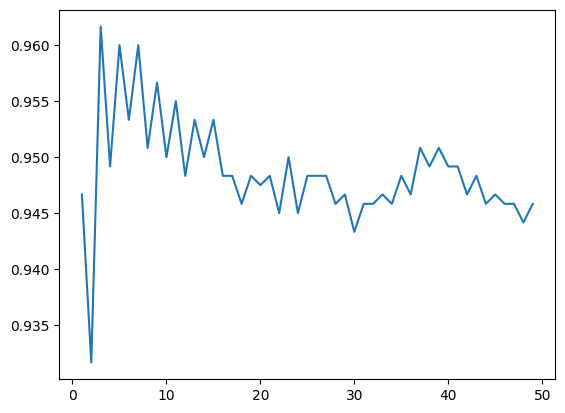

In [ ]:
for x in range(5):
  dataset2_train_features, dataset2_test_features, dataset2_train_labels, dataset2_test_labels = train_test_split(dataset2_features,dataset2_labels, test_size=0.2)
  kGraph(dataset2_train_features,dataset2_train_labels,dataset2_test_features,dataset2_test_labels)



Max accuracy of 0.9991666666666666 at k=2
Max accuracy of 0.9983333333333333 at k=6
Max accuracy of 0.9975 at k=2
Max accuracy of 0.9983333333333333 at k=10
Max accuracy of 0.9991666666666666 at k=5


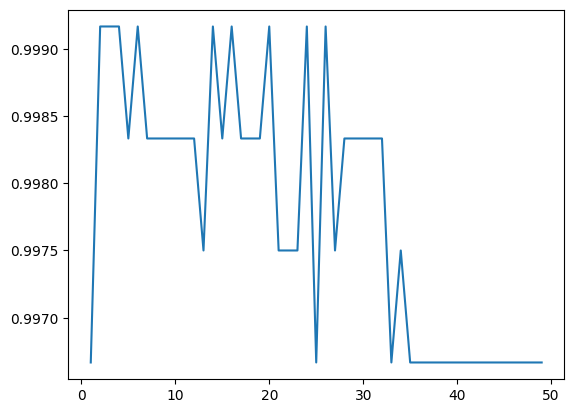

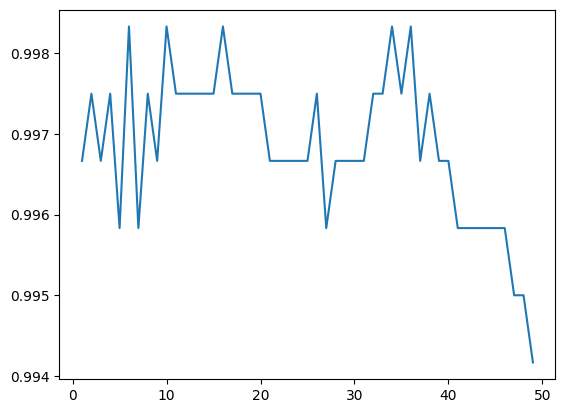

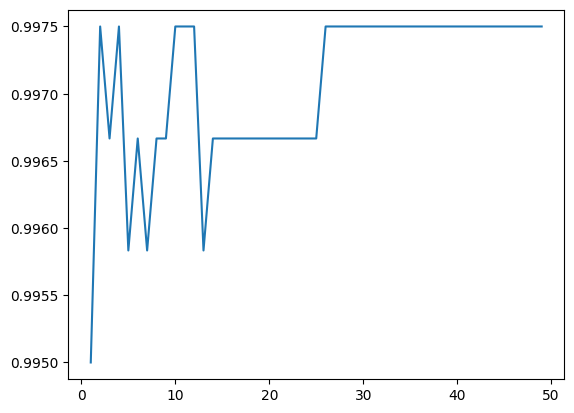

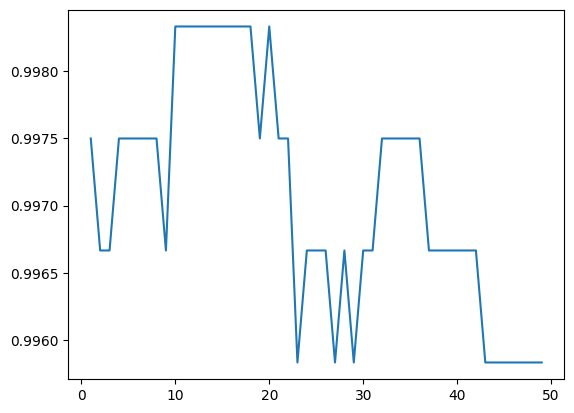

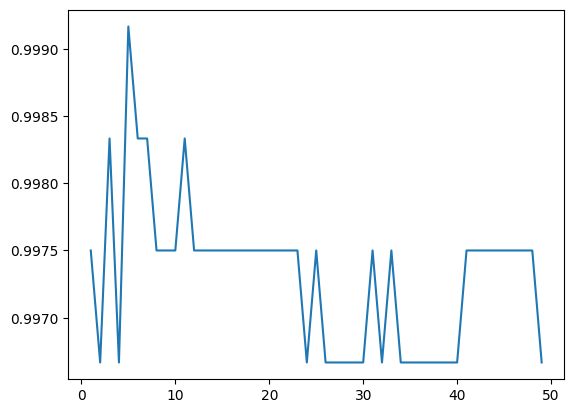

In [ ]:
for x in range(5):
  dataset3_train_features, dataset3_test_features, dataset3_train_labels, dataset3_test_labels = train_test_split(dataset3_features,dataset3_labels, test_size=0.2)
  kGraph(dataset3_train_features,dataset3_train_labels,dataset3_test_features,dataset3_test_labels)

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier(algorithm='auto', p=1, leaf_size=20)
parameters_KNN = {
    'n_neighbors': (1,40, 1),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski','cosine'),
}

grid_search_KNN = GridSearchCV(
    estimator=estimator,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)


grid_search_KNN.fit(dataset3_features,dataset3_labels)

#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ )
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score - KNN: 0.9923333333333334


In [ ]:
estimator = KNeighborsClassifier(algorithm='auto', p=1, leaf_size=20)
parameters_KNN = {
    'n_neighbors': (35,40, 1),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski','cosine'),
}

grid_search_KNN = GridSearchCV(
    estimator=estimator,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

grid_search_KNN.fit(dataset2_features,dataset2_labels)

#Parameter setting that gave the best results on the hold out data.
print(grid_search_KNN.best_params_ )
#Mean cross-validated score of the best_estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )

{'metric': 'cosine', 'n_neighbors': 35, 'weights': 'distance'}
Best Score - KNN: 0.95
